<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/BannerUFPR.png" width="700" alt="PPGOLD/PPGMNE Python:INTRO"  />
</p>


# SAOP09 - Data Science For Business
## Prof. Eduardo Pécora

# Regressão Linear Múltipla - $R^2$
Tempo estimado: **30** minutos

## Objetivos

Após completar esta aula, você será capaz de:

* Entender o impacto do $R^2$ e as razões pelas quais ele não é um bom estimador de eficiência do método

## Bibliotecas

In [21]:
# importando a biblioteca pandas para manipulação de dados
import pandas as pd

# Iportando numpy para criar, manipular e operar em arrays multidimensionais, bem como para realizar operações matemáticas avançadas.
import numpy as np

# Importando a biblioteca math que fornece funções matemáticas básicas
import math 

# importando as bibliotecas do matplotlib para gerar gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt

# Importando biblioteca do seaborn para gerar gráficos mais atraentes e informativos
import seaborn as sns

# Importando a classe LinearRegression do sklearn 
# Essa classe implementa uma versão da regressão linear simples ou múltipla
# Usado para modelar a relação entre uma variável dependente contínua e uma ou mais variáveis independentes.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Usado para exibir os gráficos gerados pela biblioteca Matplotlib diretamente no notebook, sem precisar abrir uma janela externa.
%matplotlib inline

## Obtendo dados

In [22]:
# Caminho do arquivo csv
caminho = "https://raw.githubusercontent.com/EduPekUfpr/PythonProject/refs/heads/main/Dados/MeuAutoLimpo.csv" 

#Obtendo arquivo e passando-o para um dataframe
df = pd.read_csv(caminho) 

In [23]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

## Regressão Linear Múltipla

### Revisando

$$
    X_k : Variáveis \ independentes \\
    Y : Variável \ dependente
$$

**Função Linear**
$$
    Yhat = \alpha + \beta_1  X_1 \ + \ \beta_2  X_2 \ + \ ... + \ \beta_k  X_k
$$

* a : se refere ao intercepto da regressão linear, ou seja, o valor de Y quando todos X são 0.
* b1, b2, bk : são os coeficientes de regressão, que representam a influência de cada variável X independente em Yhat

### Implementação

<p>Vamos desenvolver um modelo utilizando as seguintes variáveis como preditoras.</p>
<ul>
    <li>Horsepower</li>
    <li>Highway-mpg</li>
</ul>


In [24]:
# Criando um objeto para regressão
lm = LinearRegression()
lm

LinearRegression()

In [27]:
# Ajustando o novo dataframe
df=df[['price','engine-size', 'curb-weight']]
#df_linear_multipla = df.drop(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
#                             'drive-wheels', 'engine-location','engine-type', 'num-of-cylinders', 'fuel-system',], axis=1)

# Criando as novas variáveis
X = df_linear_multipla.drop(["price"], axis = 1)
Y = df_linear_multipla['price']

# Carregando o modelo
lm.fit(X, Y)

# Exibindo o R^2
R2=lm.score(X,Y)

print("SCORE: %.4f" % R2)

SCORE: 0.7925


## O impacto do $R^2$

In [47]:
# Adicionando 30 colunas aleatórias no DF original
df_new = df.copy()
for i in range(100):
    col_name = 'Random_' + str(i+1)
    df_new[col_name] = np.random.randint(1, 100, size=len(df))
df_new.head()

/var/folders/fr/1byq_zn551q9hcfd9_hhlv5h0000gn/T/ipykernel_28312/2894178895.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[col_name] = np.random.randint(1, 100, size=len(df))
/var/folders/fr/1byq_zn551q9hcfd9_hhlv5h0000gn/T/ipykernel_28312/2894178895.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[col_name] = np.random.randint(1, 100, size=len(df))


,price,engine-size,curb-weight,Random_1,Random_2,Random_3,Random_4,Random_5,Random_6,Random_7,...,Random_91,Random_92,Random_93,Random_94,Random_95,Random_96,Random_97,Random_98,Random_99,Random_100
0,13495.0,130,2548,24,81,17,1,21,5,77,...,27,57,39,36,64,97,46,25,2,63
1,16500.0,130,2548,80,57,66,49,97,77,40,...,2,92,9,37,2,31,77,21,85,67
2,16500.0,152,2823,80,51,4,70,92,47,43,...,44,54,1,9,91,6,99,50,43,32
3,13950.0,109,2337,78,58,71,90,86,73,74,...,61,10,73,46,63,90,55,78,81,83
4,17450.0,136,2824,50,86,73,27,13,39,92,...,43,36,78,92,18,58,1,55,33,62


In [48]:
# Ajustando o novo dataframe
df_linear_multipla_r2 = df_new.copy()

# Criando as novas variáveis
X = df_linear_multipla_r2.drop(["price"], axis = 1)
Y = df_linear_multipla_r2['price']

# Carregando o modelo
lm.fit(X, Y)

# Exibindo o R^2
R2=lm.score(X,Y)

print("SCORE: %.4f" % R2)

SCORE: 0.8958


* Calcular os valores previstos:

In [49]:
#Fazendo a predição dos dados

YHatLinMult = lm.predict(X)

# Carregando os valores previstos para o dataframe
df_linear_multipla.loc[:,'YHat'] = YHatLinMult

# Visualizando as primeiras linhas do dataframe
df_linear_multipla.head(5)

,price,engine-size,curb-weight,YHat,Deviation
0,13495.0,130,2548,16491.407317,40.219420
1,16500.0,130,2548,17116.022701,952.692229
2,16500.0,152,2823,20367.470441,-3332.993967
3,13950.0,109,2337,12561.862821,-4628.173426
4,17450.0,136,2824,17414.527201,-1501.938786


In [50]:
# Analisando a estatística descritiva
df_linear_multipla[['price','YHat']].describe()

,price,YHat
count,201.000000,201.000000
mean,13207.129353,13207.129353
std,7947.066342,7521.711240
min,5118.000000,1875.413533
25%,7775.000000,7762.911214
50%,10295.000000,11162.454095
75%,16500.000000,16783.574421
max,45400.000000,44723.227261


### Comparando Previsto x Real

Vamos usar o recurso gráfico para visualizar esse erro.

Text(45000, 3.3e-05, 'SCORE: 0.895818')

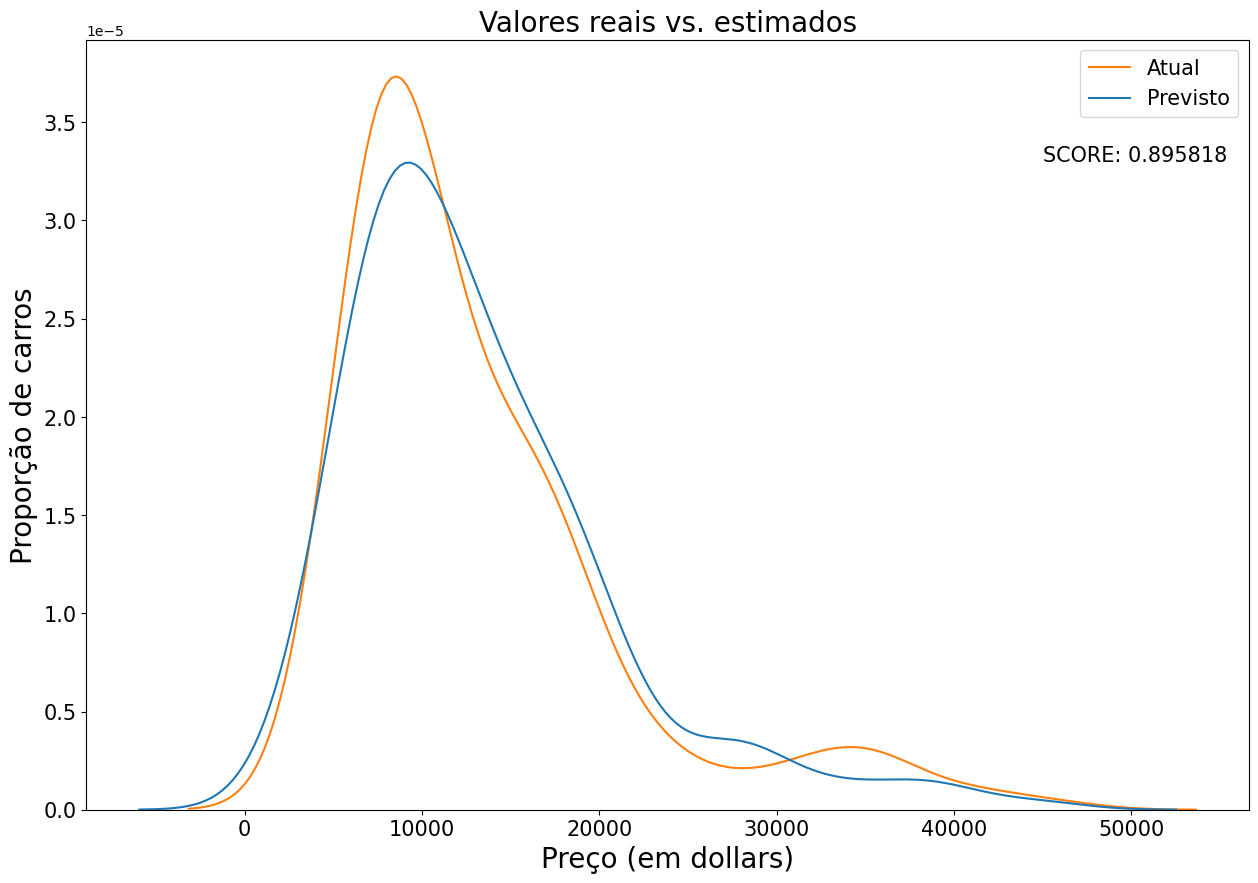

In [51]:
plt.figure(figsize=(15, 10))

sns.kdeplot(data = df_linear_multipla[['YHat','price']])

plt.title('Valores reais vs. estimados', size = 20)
plt.xlabel('Preço (em dollars)', size = 20)
plt.ylabel('Proporção de carros', size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15) 
plt.legend(labels=["Atual","Previsto"], fontsize = 15, bbox_to_anchor=(1, 1))

tt = "SCORE: %4f" % R2

plt.text(45000, 0.000033, tt, size = 15)

### Cálculo dos erros

Text(0.5, 0, 'Resíduo (em dollars)')

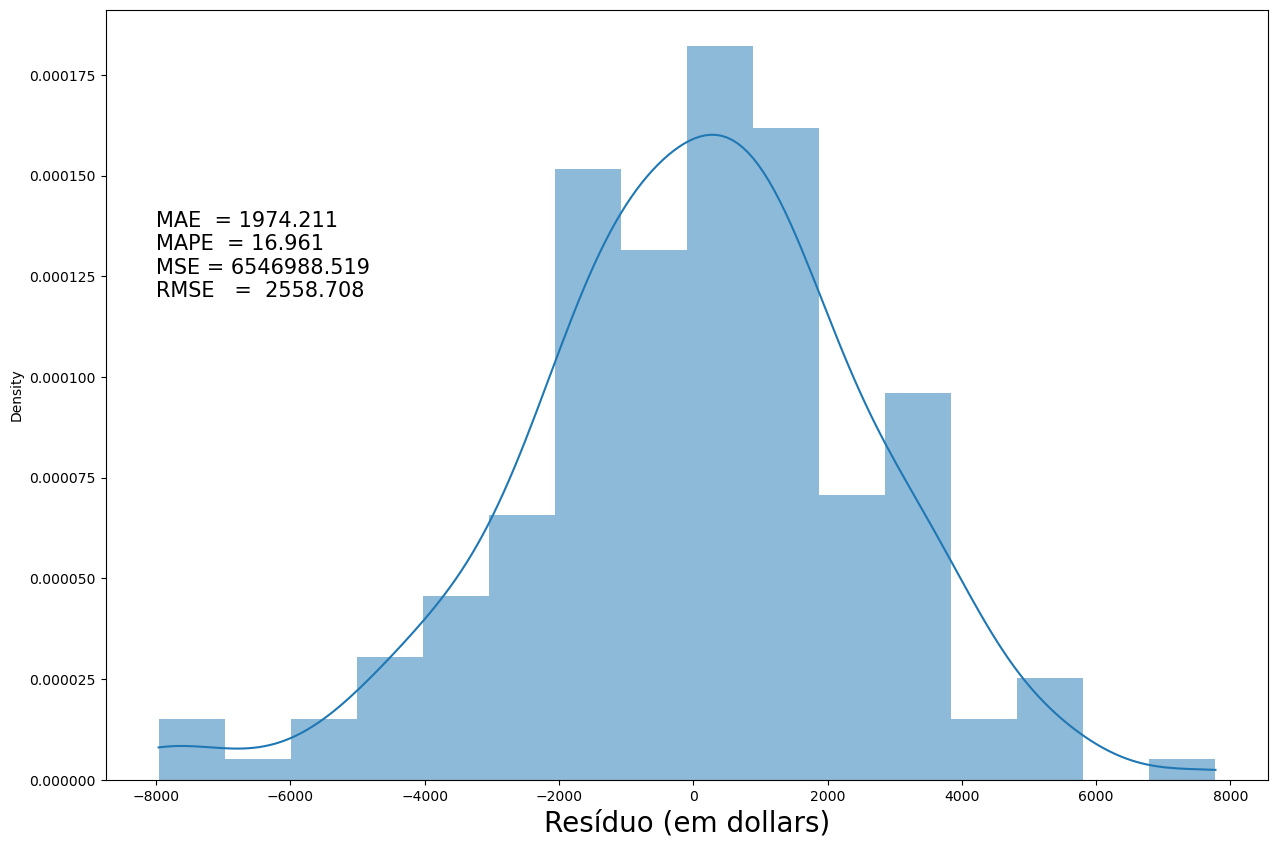

In [53]:
# Erro
df_linear_multipla.loc[:,'Deviation'] = df_linear_multipla['YHat']-df_linear_multipla['price']

y_train = df_linear_multipla['price']
y_pred  = df_linear_multipla['YHat']

mae = mean_absolute_error(y_train, y_pred)
mape = 100*mean_absolute_percentage_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)

plt.figure(figsize=(15, 10))

tt = "MAE  = %.3f \nMAPE  = %.3f \nMSE = %.3f \nRMSE   =  %.3f" % (mae, mape, mse, rmse)

sns.histplot(x=df_linear_multipla['Deviation'], kde=True, stat="density", linewidth=0)
plt.text(-8000, 0.00012, tt, size=15, color = "black")
plt.xlabel('Resíduo (em dollars)', size = 20)

## Fique Conectado

- [![YouTube](https://img.icons8.com/ios-filled/40/000000/youtube-play.png)](https://www.youtube.com/@LigaDataScience/videos)  
  Explore nossos vídeos educacionais e webinars sobre ciência de dados, machine learning e inteligência artificial. Inscreva-se para não perder nenhuma atualização!

- [![LinkedIn](https://img.icons8.com/ios-filled/40/000000/linkedin.png)](https://www.linkedin.com/company/liga-data-science-ufpr/)  
  Siga-nos no LinkedIn para as últimas novidades, oportunidades de carreira e networking profissional no campo da ciência de dados.

- [![Instagram](https://img.icons8.com/ios-filled/40/000000/instagram-new.png)](https://www.instagram.com/ligadatascience/)  
  Confira nosso Instagram para conteúdos dos bastidores, destaques de eventos e o dia a dia da Liga Data Science. Faça parte da nossa jornada!


## Autores

<a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pecora</a>, <a href="https://www.linkedin.com/in/hesauhugocavalcanti/" target="_blank">Hesau Hugo</a> , <a href="https://www.linkedin.com/in/joão-gabriel-santin-botelho/" target="_blank">João Gabriel</a>

## Referências:

* Documentação da biblioteca <a href="https://pandas.pydata.org/docs/">Pandas</a>
* Documentação da biblioteca <a href="https://seaborn.pydata.org/">Seaborn</a>
* Documentação do biblioteca <a href="https://matplotlib.org/">Matplotlib</a>
* Documentação do biblioteca <a href="https://numpy.org/devdocs/reference/index.html">Numpy</a>

## Log de modificações

| Data | Versão | Modificado por | Descrição |
| -----------| ------- | ---------- | ---------------------------------- |
|  17-04-2023          | 1.0     | Hesau Hugo    | Inicial               |
| 22-04-2024       | 1.1     | Eduardo Pecora    | Estrutura Aula        |
| 18-09-2024       | 1.2     | João Gabriel      | Atualização           |